# Determining a location for opening a shopping mall in the city of Mumbai, Maharashtra

## IBM Coursera Capstone, Applied Data Science Capstone

### Week 5 code report

In [2]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import csv

#### Getting the dataframe of Mumbai with the respective neighborhoods in each Suburb

In [137]:
df = pd.read_csv('C:/Users/LENOVO/Neighborhoods.csv')

In [138]:
df.head()

,Unnamed: 0,Suburb,Neighborhood
0,0,Western Suburbs,Andheri
1,1,Western Suburbs,Mira-Bhayandar
2,2,Western Suburbs,Bandra
3,3,Western Suburbs,Borivali
4,4,Western Suburbs,Dahisar


In [139]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [140]:
df.head()

,Suburb,Neighborhood
0,Western Suburbs,Andheri
1,Western Suburbs,Mira-Bhayandar
2,Western Suburbs,Bandra
3,Western Suburbs,Borivali
4,Western Suburbs,Dahisar


In [141]:
df

,Suburb,Neighborhood
0,Western Suburbs,Andheri
1,Western Suburbs,Mira-Bhayandar
2,Western Suburbs,Bandra
3,Western Suburbs,Borivali
4,Western Suburbs,Dahisar
5,Western Suburbs,Goregaon
6,Western Suburbs,Jogeshwari
7,Western Suburbs,Juhu
8,Western Suburbs,Kandivali west
9,Western Suburbs,Kandivali east


In [142]:
df.shape

(39, 2)

#### Importing Libraries

In [144]:
import numpy as np
import json
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

!pip install geocoder
from geopy.geocoders import Nominatim
import geocoder

  Using cached https://files.pythonhosted.org/packages/4f/6b/13166c909ad2f2d76b929a4227c952630ebaf0d729f6317eb09cbceccbab/geocoder-1.38.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f2/98/7e6d147fd16a10a5f821db6e25f192265d6ecca3d82957a4fdd592cad49c/ratelim-0.1.6-py2.py3-none-any.whl


In [147]:
import geocoder

from pandas.io.json import json_normalize
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import folium

Getting the latitude and longitude for each neighborhood in Mumbai 

In [150]:
def get_latlng(neighborhood):
    
    latlng_coords = None
    
    while latlng_coords is None:
        g = geocoder.arcgis('{}, Mumbai, Maharashtra'.format(neighborhood))
        latlng_coords = g.latlng
    return latlng_coords

In [151]:
coords = [ get_latlng(neighborhood) for neighborhood in df["Neighborhood"].tolist() ]

In [152]:
coords

[[19.118459378296492, 72.84176321065843],
 [18.950544995556605, 72.82707550375092],
 [19.054370000000063, 72.84017000000006],
 [19.229360000000042, 72.85751000000005],
 [19.250030000000038, 72.85907000000003],
 [19.164550000000077, 72.84946000000008],
 [19.137920000000065, 72.84941000000003],
 [19.014920000000075, 72.84522000000004],
 [19.207100000000025, 72.83498000000003],
 [19.205760000000055, 72.86953000000005],
 [19.06913000000003, 72.84640000000007],
 [19.186550000000068, 72.84842000000003],
 [19.081770000000063, 72.84205000000003],
 [19.07934000000006, 72.83916000000005],
 [19.01657000000006, 72.85853000000003],
 [19.100630000000024, 72.84378000000004],
 [19.145560000000046, 72.94856000000004],
 [19.08652321008152, 72.90900774216628],
 [19.131380000000036, 72.93568000000005],
 [19.064980000000048, 72.88069000000007],
 [19.171830000000057, 72.95565000000005],
 [19.123100000000022, 72.90942000000007],
 [19.023270726614363, 72.84390704954123],
 [19.111090000000047, 72.9278100000000

In [154]:
df_coords = pd.DataFrame(coords, columns=['Latitude','Longitude'])

Merging the two dataframes

In [155]:
df_coords.head()

,Latitude,Longitude
0,19.118459,72.841763
1,18.950545,72.827076
2,19.054370,72.840170
3,19.229360,72.857510
4,19.250030,72.859070


In [156]:
df['Latitude'] = df_coords['Latitude']
df['Longitude'] = df_coords['Longitude']

In [157]:
df.shape

(39, 4)

In [158]:
df.head()

,Suburb,Neighborhood,Latitude,Longitude
0,Western Suburbs,Andheri,19.118459,72.841763
1,Western Suburbs,Mira-Bhayandar,18.950545,72.827076
2,Western Suburbs,Bandra,19.054370,72.840170
3,Western Suburbs,Borivali,19.229360,72.857510
4,Western Suburbs,Dahisar,19.250030,72.859070


#### This is the merged dataset

### Let's create a map of Mumbai

In [159]:
address = 'Mumbai, Maharashtra'

geolocator = Nominatim(user_agent="my-application")

location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geograpical coordinate of Mumbai, Maharashtra: {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Mumbai, Maharashtra: 18.9387711, 72.8353355.


In [167]:
map_mum = folium.Map(location=[latitude, longitude], zoom_start=12)

for lat, lng, neigh, sub in zip(df['Latitude'], df['Longitude'], df['Neighborhood'], df['Suburb']):
    label = '{},{}'.format(neigh, sub)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng], radius=5, popu=label, color='blue', fill=True, fill_color='#3186cc', fill_opacity=0.7,
                       parse_html=False).add_to(map_mum)

map_mum

In [168]:
CLIENT_ID = 'J5OOENEHJIEBSZWRPETGA5HD2FTSL52I4O4KKJQ2HMPR15RO' # your Foursquare ID
CLIENT_SECRET = '0BHJFDCN0MPMIHDDDBCVJ210LPRFSUAYQ4YSHJVSUPUDKYDR' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: J5OOENEHJIEBSZWRPETGA5HD2FTSL52I4O4KKJQ2HMPR15RO
CLIENT_SECRET:0BHJFDCN0MPMIHDDDBCVJ210LPRFSUAYQ4YSHJVSUPUDKYDR


In [169]:
radius = 500
LIMIT = 100

venues = []

for lat, long, sub, neigh in zip(df['Latitude'], df['Longitude'], df['Suburb'], df['Neighborhood']):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    for venue in results:
        venues.append((
            sub,
            neigh,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

Creating a new dataframe with these venues

In [170]:
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Suburb', 'Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue Name', 'Venue Latitude', 'Venue Longitude', 'Venue Category']

print(venues_df.shape)
venues_df.head()

(581, 8)


,Suburb,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue Name,Venue Latitude,Venue Longitude,Venue Category
0,Western Suburbs,Andheri,19.118459,72.841763,Merwans Cake shop,19.119300,72.845418,Bakery
1,Western Suburbs,Andheri,19.118459,72.841763,Radha Krishna Veg Restaurant,19.115130,72.843060,Indian Restaurant
2,Western Suburbs,Andheri,19.118459,72.841763,Cafe Alfa,19.119667,72.843560,Indian Restaurant
3,Western Suburbs,Andheri,19.118459,72.841763,Shoppers Stop,19.114935,72.842708,Department Store
4,Western Suburbs,Andheri,19.118459,72.841763,McDonald's,19.119691,72.846102,Fast Food Restaurant


Let's see which of these neighborhoods have Shopping Malls

In [171]:
venues_df['Venue Category'].unique()

array(['Bakery', 'Indian Restaurant', 'Department Store',
       'Fast Food Restaurant', 'Vegetarian / Vegan Restaurant',
       'Restaurant', 'Athletics & Sports', 'Food Court', 'Gift Shop',
       'Shoe Store', 'Shop & Service', 'Diner', 'Electronics Store',
       'Breakfast Spot', 'Golf Course', 'Food Truck', 'Platform', 'Food',
       'Bus Station', 'Ice Cream Shop', 'Café', 'Train Station',
       'Convenience Store', 'Paper / Office Supplies Store', 'Brewery',
       'Pier', 'Furniture / Home Store', 'Lake', 'Chinese Restaurant',
       'Clothing Store', 'Burger Joint', 'Snack Place', 'Pizza Place',
       'Bar', 'Seafood Restaurant', 'Bookstore', 'Design Studio',
       'Mughlai Restaurant', 'Asian Restaurant', 'Pharmacy',
       'Food & Drink Shop', 'Coffee Shop', 'Lounge', 'Hotel', 'Juice Bar',
       'Farmers Market', 'Movie Theater', 'Gym / Fitness Center',
       'Neighborhood', 'Dessert Shop', 'Sandwich Place', 'Gym',
       "Women's Store", 'Jewelry Store', 'Steakhouse',

In [172]:
malls_number = venues_df['Neighborhood'].loc[venues_df['Venue Category'] == 'Shopping Mall']

273         Powai
291    Vidyavihar
380         Dadar
532       Matunga
573        Tardeo
Name: Neighborhood, dtype: object

So, we see that 'Powai, Vidyavihir, Dadar, Matunga, Tardeo' have shopping malls

As the problem is that already there are already so many shopping malls, it's difficult to zip new malls addition to the the large population in that neighborhood

#### Let's check the number of shopping malls already in these neighborhoods. 
This can be carried out by analyzing each neighborhood.

In [174]:
mumbai_onehot = pd.get_dummies(venues_df[['Venue Category']], prefix="", prefix_sep="")

mumbai_onehot['Suburb'] = venues_df['Suburb'] 
mumbai_onehot['Neighborhoods'] = venues_df['Neighborhood'] 

fixed_columns = list(mumbai_onehot.columns[-2:]) + list(mumbai_onehot.columns[:-2])
mumbai_onehot = mumbai_onehot[fixed_columns]

print(mumbai_onehot.shape)
mumbai_onehot.head()

(581, 123)


,Suburb,Neighborhoods,Accessories Store,American Restaurant,Antique Shop,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Beach,Bed & Breakfast,Bengali Restaurant,Bookstore,Boutique,Breakfast Spot,Brewery,Burger Joint,Bus Station,Cafeteria,Café,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Donut Shop,Electronics Store,Farmers Market,Fast Food Restaurant,Field,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,German Restaurant,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Historic Site,History Museum,Hookah Bar,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Lake,Liquor Store,Lounge,Luggage Store,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Men's Store,Middle Eastern Restaurant,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Movie Theater,Mughlai Restaurant,Multicuisine Indian Restaurant,Music Store,Neighborhood,Noodle House,North Indian Restaurant,Office,Optical Shop,Paper / Office Supplies Store,Park,Parsi Restaurant,Pharmacy,Pier,Pizza Place,Platform,Playground,Plaza,Pub,Restaurant,Roof Deck,Sandwich Place,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,South Indian Restaurant,Spa,Sports Bar,Stadium,Steakhouse,Sushi Restaurant,Tea Room,Theme Park,Train Station,Vegetarian / Vegan Restaurant,Whisky Bar,Women's Store
0,Western Suburbs,Andheri,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Western Suburbs,Andheri,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Western Suburbs,Andheri,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Western Suburbs,Andheri,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Western Suburbs,Andheri,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [184]:
mum_grouped = mumbai_onehot.groupby(["Suburb", "Neighborhoods"]).mean().reset_index()

print(mum_grouped.shape)
mum_grouped

(39, 123)


,Suburb,Neighborhoods,Accessories Store,American Restaurant,Antique Shop,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Beach,Bed & Breakfast,Bengali Restaurant,Bookstore,Boutique,Breakfast Spot,Brewery,Burger Joint,Bus Station,Cafeteria,Café,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Donut Shop,Electronics Store,Farmers Market,Fast Food Restaurant,Field,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,German Restaurant,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Historic Site,History Museum,Hookah Bar,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Lake,Liquor Store,Lounge,Luggage Store,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Men's Store,Middle Eastern Restaurant,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Movie Theater,Mughlai Restaurant,Multicuisine Indian Restaurant,Music Store,Neighborhood,Noodle House,North Indian Restaurant,Office,Optical Shop,Paper / Office Supplies Store,Park,Parsi Restaurant,Pharmacy,Pier,Pizza Place,Platform,Playground,Plaza,Pub,Restaurant,Roof Deck,Sandwich Place,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,South Indian Restaurant,Spa,Sports Bar,Stadium,Steakhouse,Sushi Restaurant,Tea Room,Theme Park,Train Station,Vegetarian / Vegan Restaurant,Whisky Bar,Women's Store
0,Eastern Suburbs,Bhandup,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.250000,0.00,0.250000,0.000000,0.00,0.000000
1,Eastern Suburbs,Ghatkopar,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.00,0.000000,0.00,0.000000,0.000000,0.318182,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.045455,0.000000,0.000000,0.000000,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.045455,0.00,0.000000
2,Eastern Suburbs,Kanjurmarg,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [185]:
len(mum_grouped[mum_grouped["Shopping Mall"] > 0])

5

#### Create a new dataframe for shopping malls only

In [189]:
df_mall = mum_grouped[['Suburb','Neighborhoods','Shopping Mall']]
df_mall

,Suburb,Neighborhoods,Shopping Mall
0,Eastern Suburbs,Bhandup,0.000000
1,Eastern Suburbs,Ghatkopar,0.000000
2,Eastern Suburbs,Kanjurmarg,0.000000
3,Eastern Suburbs,Kurla,0.000000
4,Eastern Suburbs,Mulund,0.000000
5,Eastern Suburbs,Powai,0.033333
6,Eastern Suburbs,Vidyavihar,0.047619
7,Eastern Suburbs,Vikhroli,0.000000
8,Harbour Suburbs,Chembur,0.000000
9,Harbour Suburbs,Govandi,0.000000


In [196]:
df_al_mall = df_mall[df_mall['Shopping Mall'] >0]
df_al_mall

,Suburb,Neighborhoods,Shopping Mall
5,Eastern Suburbs,Powai,0.033333
6,Eastern Suburbs,Vidyavihar,0.047619
15,South Mumbai,Dadar,0.037037
20,South Mumbai,Matunga,0.027778
22,South Mumbai,Tardeo,0.058824


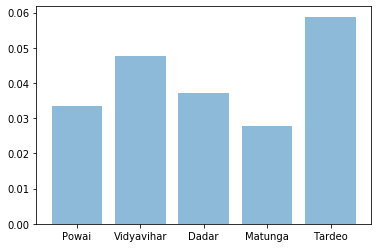

In [197]:
plt.bar(df_al_mall['Neighborhoods'], df_al_mall['Shopping Mall'], align='center', alpha=0.5)
plt.show()

## Let's get the population data for developed neighborhoods in Mumbai

In [279]:
source = requests.get('http://www.indiaonlinepages.com/population/mumbai-population.html').text
soup = BeautifulSoup(source, 'lxml')
table = soup.find('table', class_='tbl-link', border="0")
rows = table.find_all('tr')
cols = [v.text.replace('\n','') for v in rows[0].find_all('td')]
df_pop = pd.DataFrame(columns=cols)
df_pop

,Ward,Area,Population,Density per Square Kilometer


In [280]:
for i in range(1, len(rows)):
    
    tds = rows[i].find_all('td')
    if len(tds) == 3:
        continue
    else:
        
        values = [td.text.replace('\n','') for td in tds]
    
    df_pop = df_pop.append(pd.Series(values, index=cols), ignore_index=True)

In [281]:
df_pop

,Ward,Area,Population,Density per Square Kilometer
0,A,Colaba,"210,847","16,868"
1,B,Sanhurst Road,"140,633","56,936"
2,C,Marine Lines,"202,922","114,001"
3,D,Grant Road,"382,841","57,744"
4,E,Byculla,"440,335","59,505"
5,F South,Parel,"396,122","28,294"
6,F North,Matunga,"524,393","40,400"
7,G South,Elphinstone,"457,931","45,793"
8,G North,Dadar/Plaza,"582,007","64,168"
9,H East,Khar/Santacruz,"580,835","42,929"


Let's clean the population data as per our original dataframe

In [282]:
df_pop.drop(['Ward'], axis=1, inplace=True)

In [283]:
df_pop = df_pop[df_pop.Area != 'Grant Road']
df_pop = df_pop[df_pop.Area != 'Marine Lines']
df_pop = df_pop[df_pop.Area != 'Elphinstone']
df_pop.reset_index()


,index,Area,Population,Density per Square Kilometer
0,0,Colaba,"210,847","16,868"
1,1,Sanhurst Road,"140,633","56,936"
2,4,Byculla,"440,335","59,505"
3,5,Parel,"396,122","28,294"
4,6,Matunga,"524,393","40,400"
5,8,Dadar/Plaza,"582,007","64,168"
6,9,Khar/Santacruz,"580,835","42,929"
7,10,Bandra,"337,391","29,211"
8,11,Andheri (East),"810,002","32,688"
9,12,Andheri (West),"700,680","29,956"


In [284]:
df_pop.reset_index(drop=True, inplace=True)

In [285]:
df_pop.head()

,Area,Population,Density per Square Kilometer
0,Colaba,"210,847","16,868"
1,Sanhurst Road,"140,633","56,936"
2,Byculla,"440,335","59,505"
3,Parel,"396,122","28,294"
4,Matunga,"524,393","40,400"


In [297]:
df_pop.rename(columns={'Area':'Neighborhood'}, inplace=True)
df_pop.head()

,Neighborhood,Population,Density per Square Kilometer
0,Colaba,"210,847","16,868"
1,Sanhurst Road,"140,633","56,936"
2,Byculla,"440,335","59,505"
3,Parel,"396,122","28,294"
4,Matunga,"524,393","40,400"


In [322]:
df_pop.dtypes

Neighborhood                               object
Population                                 object
Density            per Square Kilometer    object
dtype: object

In [323]:
df_pop = df_pop.head(21)
df_pop['Population'] = df_pop['Population'].replace({',':''}, regex=True).astype(float)

In [324]:
df_pop.dtypes

Neighborhood                                object
Population                                 float64
Density            per Square Kilometer     object
dtype: object

In [325]:
df_pop.head()

,Neighborhood,Population,Density per Square Kilometer
0,Colaba,210847.0,"16,868"
1,Sanhurst Road,140633.0,"56,936"
2,Byculla,440335.0,"59,505"
3,Parel,396122.0,"28,294"
4,Matunga,524393.0,"40,400"


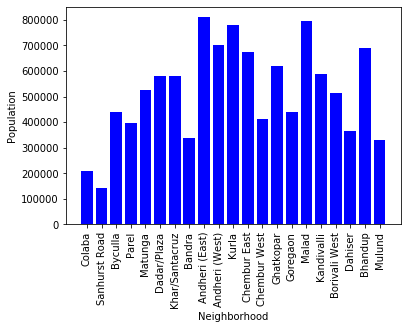

In [326]:
plt.bar("Neighborhood", "Population", data = df_pop, color = "blue")
plt.xlabel("Neighborhood")
plt.xticks(rotation = 90)
plt.ylabel("Population")
plt.show()

In [331]:
df_pop['Density            per Square Kilometer'] = df_pop['Density            per Square Kilometer'].replace({',':''}, regex=True).astype(float)

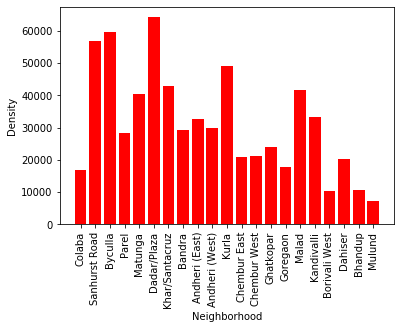

In [334]:
plt.bar("Neighborhood", "Density            per Square Kilometer", data = df_pop, color = "red")
plt.xlabel("Neighborhood")
plt.xticks(rotation = 90)
plt.ylabel("Density")
plt.show()

By comparing the above 2 bar graphs, we can see that even when Andheri has the highest population, Dadar has the highest density of population

In [352]:
df_pop.to_csv('Pop.csv')


df_pop = pd.read_csv('C:/Users/LENOVO/Pop.csv')

In [368]:
df_merged = pd.merge(left=df, right=df_pop, left_on='Neighborhood', right_on='Neighborhood')

In [369]:
df_merged

,Suburb,Neighborhood,Latitude,Longitude,Population,Density per Square Kilometer
0,Western Suburbs,Bandra,19.054370,72.840170,337391,29211
1,Western Suburbs,Borivali,19.229360,72.857510,513077,10262
2,Western Suburbs,Dahisar,19.250030,72.859070,363827,20213
3,Western Suburbs,Goregaon,19.164550,72.849460,437849,17915
4,Western Suburbs,Malad,19.186550,72.848420,796775,41651
5,Western Suburbs,Santacruz,19.081770,72.842050,580835,42929
6,Eastern Suburbs,Bhandup,19.145560,72.948560,691227,10800
7,Eastern Suburbs,Ghatkopar,19.086523,72.909008,619556,23866
8,Eastern Suburbs,Kurla,19.064980,72.880690,778218,49006
9,Eastern Suburbs,Mulund,19.171830,72.955650,330195,7270


In [370]:
dfg = df_merged.groupby(['Suburb']).sum()
dfg

,Latitude,Longitude,Population,Density per Square Kilometer
Suburb,,,,
Eastern Suburbs,76.468893,291.693908,2419196,90942
Harbour Suburbs,19.062180,72.902410,1088890,41989
South Mumbai,94.938970,364.202520,2153704,209235
Western Suburbs,114.966630,437.096680,3029754,162181


In [373]:
df_al_mall[['Suburb','Shopping Mall']]

,Suburb,Shopping Mall
5,Eastern Suburbs,0.033333
6,Eastern Suburbs,0.047619
15,South Mumbai,0.037037
20,South Mumbai,0.027778
22,South Mumbai,0.058824


In [374]:
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

In [385]:
dfg_new = dfg[['Population', 'Density            per Square Kilometer']]

dfg_new

,Population,Density per Square Kilometer
Suburb,,
Eastern Suburbs,2419196,90942
Harbour Suburbs,1088890,41989
South Mumbai,2153704,209235
Western Suburbs,3029754,162181


In [386]:
df_al_mall_new = df_al_mall.groupby(['Suburb']).sum()
df_al_mall_new

,Shopping Mall
Suburb,
Eastern Suburbs,0.080952
South Mumbai,0.123638


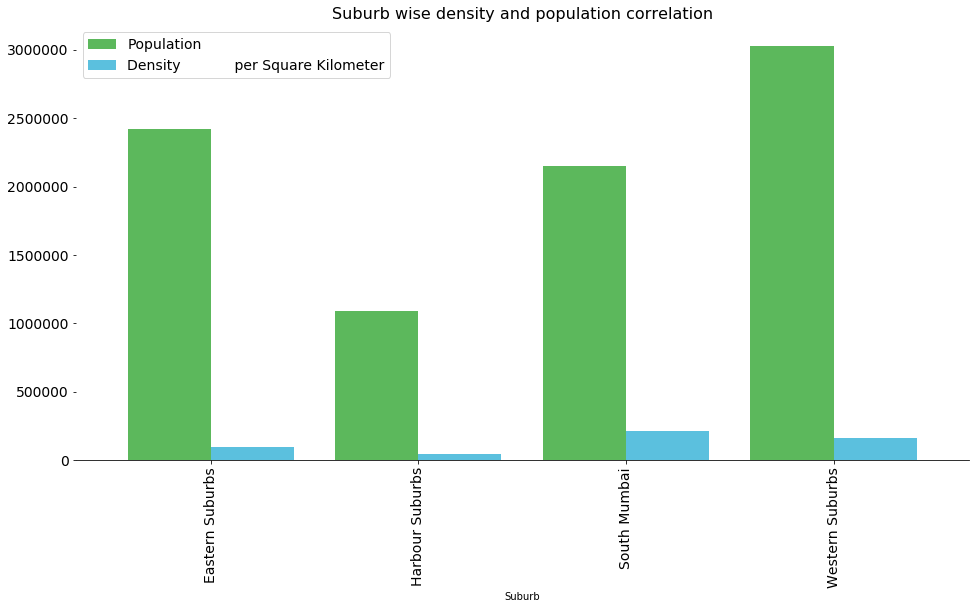

In [391]:
ax1 = dfg_new.plot(kind='bar', figsize = (16,8),
                width = 0.8,
                color = ('#5cb85c', '#5bc0de'),
                fontsize = 14)
ax1.set_title("Suburb wise density and population correlation", 
             fontsize = 16)
ax1.legend(fontsize = 14)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)




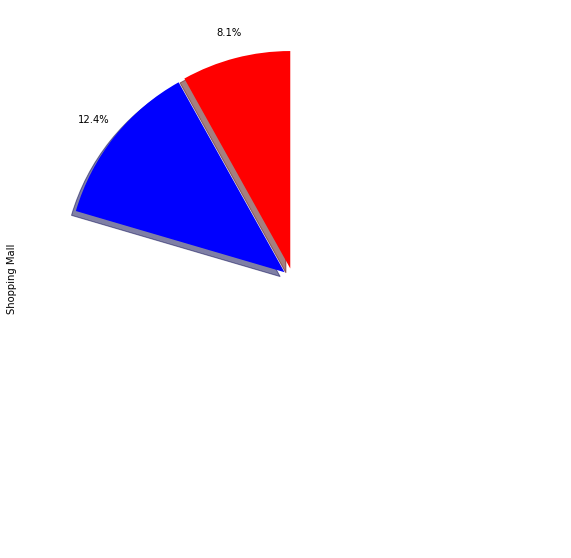

In [398]:
explode_list=[0.05,0.05]
df_al_mall_new['Shopping Mall'].plot(kind='pie', figsize=(10,10),
                                    autopct='%1.1f%%', startangle=90, shadow=True,
                                    labels=None, pctdistance=1.12,
                                    colors=['Red', 'Blue'],
                                    explode = explode_list)
plt.show()

### Now we have found out that South Mumbai has the greatest number of malls with population density as the highest but low populaiton. This gives more area for building a plot to open a Shopping Mall.
#### This is just a assumption. Let's cluster the neighborhoods in Mumbai to check if our assumption is right

In [403]:
df_cluster = pd.merge(df, df_mall, on='Neighborhood')

In [409]:
df_cluster.rename(columns={'Suburb_x':'Suburb'}, inplace=True)
df_cluster

,Suburb,Neighborhood,Latitude,Longitude,Shopping Mall
0,Western Suburbs,Andheri,19.118459,72.841763,0.000000
1,Western Suburbs,Mira-Bhayandar,18.950545,72.827076,0.000000
2,Western Suburbs,Bandra,19.054370,72.840170,0.000000
3,Western Suburbs,Borivali,19.229360,72.857510,0.000000
4,Western Suburbs,Dahisar,19.250030,72.859070,0.000000
5,Western Suburbs,Goregaon,19.164550,72.849460,0.000000
6,Western Suburbs,Jogeshwari,19.137920,72.849410,0.000000
7,Western Suburbs,Juhu,19.014920,72.845220,0.000000
8,Western Suburbs,Kandivali west,19.207100,72.834980,0.000000
9,Western Suburbs,Kandivali east,19.205760,72.869530,0.000000


In [418]:
k_clusters = 4

dfk = df_cluster.drop(['Suburb','Neighborhood','Latitude', 'Longitude'], axis = 1)
kmeans = KMeans(n_clusters=k_clusters, random_state=0).fit(dfk)
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [421]:
k_labels = kmeans.labels_

In [422]:
df_cluster['Cluster Labels'] = k_labels

In [423]:
df_cluster

,Suburb,Neighborhood,Latitude,Longitude,Shopping Mall,Cluster Labels
0,Western Suburbs,Andheri,19.118459,72.841763,0.000000,0
1,Western Suburbs,Mira-Bhayandar,18.950545,72.827076,0.000000,0
2,Western Suburbs,Bandra,19.054370,72.840170,0.000000,0
3,Western Suburbs,Borivali,19.229360,72.857510,0.000000,0
4,Western Suburbs,Dahisar,19.250030,72.859070,0.000000,0
5,Western Suburbs,Goregaon,19.164550,72.849460,0.000000,0
6,Western Suburbs,Jogeshwari,19.137920,72.849410,0.000000,0
7,Western Suburbs,Juhu,19.014920,72.845220,0.000000,0
8,Western Suburbs,Kandivali west,19.207100,72.834980,0.000000,0
9,Western Suburbs,Kandivali east,19.205760,72.869530,0.000000,0


In [424]:
df_cluster.shape

(39, 6)

### Let's visualize those clusters

In [433]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k_clusters)
ys = [i+x+(i*x)**2 for i in range(k_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_cluster['Latitude'], df_cluster['Longitude'], df_cluster['Neighborhood'], df_cluster['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Cluster 0

In [434]:
df_cluster.loc[df_cluster['Cluster Labels'] == 0]

,Suburb,Neighborhood,Latitude,Longitude,Shopping Mall,Cluster Labels
0,Western Suburbs,Andheri,19.118459,72.841763,0.0,0
1,Western Suburbs,Mira-Bhayandar,18.950545,72.827076,0.0,0
2,Western Suburbs,Bandra,19.054370,72.840170,0.0,0
3,Western Suburbs,Borivali,19.229360,72.857510,0.0,0
4,Western Suburbs,Dahisar,19.250030,72.859070,0.0,0
5,Western Suburbs,Goregaon,19.164550,72.849460,0.0,0
6,Western Suburbs,Jogeshwari,19.137920,72.849410,0.0,0
7,Western Suburbs,Juhu,19.014920,72.845220,0.0,0
8,Western Suburbs,Kandivali west,19.207100,72.834980,0.0,0
9,Western Suburbs,Kandivali east,19.205760,72.869530,0.0,0


#### Cluster 1

In [440]:
df_1 = df_cluster.loc[df_cluster['Cluster Labels'] == 1]
df_cluster.loc[df_cluster['Cluster Labels'] == 1]

,Suburb,Neighborhood,Latitude,Longitude,Shopping Mall,Cluster Labels
21,Eastern Suburbs,Powai,19.12310,72.90942,0.033333,1
31,South Mumbai,Dadar,19.01991,72.84086,0.037037,1
35,South Mumbai,Matunga,19.02720,72.85589,0.027778,1


#### Cluster 2

In [437]:
df_cluster.loc[df_cluster['Cluster Labels'] == 2]

,Suburb,Neighborhood,Latitude,Longitude,Shopping Mall,Cluster Labels
37,South Mumbai,Tardeo,18.97254,72.81478,0.058824,2


#### Cluster 3

In [438]:
df_cluster.loc[df_cluster['Cluster Labels'] == 3]

,Suburb,Neighborhood,Latitude,Longitude,Shopping Mall,Cluster Labels
22,Eastern Suburbs,Vidyavihar,19.023271,72.843907,0.047619,3


#### After analyzing this, we can say that one can open a shopping mall in Cluster-3 but let's dig deeper into Cluster-1

In [441]:
df_1

,Suburb,Neighborhood,Latitude,Longitude,Shopping Mall,Cluster Labels
21,Eastern Suburbs,Powai,19.12310,72.90942,0.033333,1
31,South Mumbai,Dadar,19.01991,72.84086,0.037037,1
35,South Mumbai,Matunga,19.02720,72.85589,0.027778,1


In [444]:
df_1 = df_1.groupby(['Suburb']).mean()

In [446]:
df_1

,Latitude,Longitude,Shopping Mall,Cluster Labels
Suburb,,,,
Eastern Suburbs,19.123100,72.909420,0.033333,1
South Mumbai,19.023555,72.848375,0.032407,1


### Conclusion

We understood the Suburb and neighborhood data for shopping malls, and also included population data into our analysis. We can say that Eastern Suburb and South Mumbai are the two apt location for setting up a mall. South Mumbai does have a greater number of Shopping malls but it is not so densely populated and there is space to create a plot for a shopping mall. On the other hand, Eastern Suburb has less space as compared to South Mumbai but have lesser number of Shopping Malls which means low competition level. South Mumbai will face a greater competition level but it is so vastly spread that if a mall is setup in an apt central location, people from all over South Mumbai can reach it. Therefore, after detailed analysis, it can be said that the optimum location for opening a shopping mall are:

   #### Powai - Eastern Suburb
   #### Matunga - South Mumbai

Lastly, property developers are advised to construct and open a Shopping Mall in one of these two neighborhoods so as to get optimum response from the area

In [449]:
map_clusters.save('my_map.html')